In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from  IPython import display
import pathlib
import shutil
import tempfile
import sklearn.metrics

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, metrics, model_selection, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers.experimental import preprocessing
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

In [4]:
raw_dataset = pd.read_csv('/Users/katana/PycharmProjects/TPM/results/immuneSubtypes_immuneLandscape.csv')
dataset_orig = raw_dataset.copy()
dataset_orig.head()

,Unnamed: 0,ParticipantBarcode,Study,leukocyte_fraction,Subclonal_genome_fraction,Stromal_Fraction,mutationrate_silent_per_Mb,mutationrate_nonsilent_per_Mb,numberOfImmunogenicMutation,numberOfBindingExpressedPMHC,...,HLA_DQA1_log,HLA_DPA1_log,HLA_DMA_log,HLA_DOA_log,HLA_DRB1_log,HLA_DQB1_log,HLA_DPB1_log,HLA_DMB_log,HLA_DOB_log,immune_subtype
0,1,TCGA-BP-4352,KIRC,0.147285,NaN,NaN,NaN,NaN,NaN,NaN,...,1.434231,2.783055,3.685654,0.824329,5.207586,2.748694,3.942541,1.777821,1.260023,1
1,2,TCGA-BP-4985,KIRC,0.214478,0.10,0.56,0.723270,2.054088,42.0,128.0,...,3.526252,5.319330,3.961959,2.318991,7.714149,7.347819,5.872673,2.703380,0.831865,1
2,3,TCGA-G6-A8L7,KIRC,0.320622,0.07,0.51,0.422155,1.415459,29.0,71.0,...,1.973442,3.066751,4.165576,1.263866,6.043164,3.615537,4.925330,1.270007,0.630840,1
3,4,TCGA-B0-5098,KIRC,0.176996,0.01,0.29,4.881514,16.051566,239.0,505.0,...,1.643624,3.600479,4.330181,2.804331,6.444533,3.090778,3.339271,1.546545,0.651861,1
4,5,TCGA-B0-5109,KIRC,0.593089,0.08,0.74,0.142327,1.167078,16.0,49.0,...,4.167978,5.854546,4.931575,3.497430,7.950497,4.203916,6.325507,3.553607,1.741102,1


In [5]:
dataset=dataset_orig[['Study','immune_subtype','HLA_A_log', 'HLA_B_log', 'HLA_C_log','HLA_E_log', 'HLA_G_log', 'B2M_log','HLA_DRA_log', 'HLA_DRB1_log', 'HLA_DQA1_log', 'HLA_DQB1_log', 'HLA_DPA1_log', 'HLA_DPB1_log', 'HLA_DMA_log', 'HLA_DMB_log', 'HLA_DOA_log', 'HLA_DOB_log']]
df_study = pd.get_dummies(dataset['Study'])
# print(df_study)
dataset = pd.concat([dataset, df_study], axis=1)
dataset.head()

dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset.isna().sum()
dataset = dataset.dropna()
dataset['immune_subtype']=dataset['immune_subtype'].astype('uint8')
dataset.Study.unique()

array(['KIRC', 'LUAD', 'UCEC', 'THCA', 'LUSC', 'PRAD', 'HNSC', 'COAD',
       'SKCM', 'BLCA', 'LIHC', 'STAD', 'OV', 'KIRP', 'CESC', 'SARC',
       'PAAD', 'READ', 'GBM', 'ESCA', 'TGCT', 'KICH', 'MESO', 'ACC',
       'UCS', 'CHOL', 'BRCA', 'PCPG', 'LGG', 'UVM'], dtype=object)

In [6]:
# random sampling with the same fraction from each tumor type
ACC_df=dataset[dataset['Study']=='ACC']
ACC_train_dataset = ACC_df.sample(frac=0.6, random_state=0)
ACC_test_dataset = ACC_df.drop(ACC_train_dataset.index)

BLCA_df=dataset[dataset['Study']=='BLCA']
BLCA_train_dataset = BLCA_df.sample(frac=0.6, random_state=0)
BLCA_test_dataset = BLCA_df.drop(BLCA_train_dataset.index)

BRCA_df=dataset[dataset['Study']=='BRCA']
BRCA_train_dataset = BRCA_df.sample(frac=0.6, random_state=0)
BRCA_test_dataset = BRCA_df.drop(BRCA_train_dataset.index)

CESC_df=dataset[dataset['Study']=='CESC']
CESC_train_dataset = CESC_df.sample(frac=0.6, random_state=0)
CESC_test_dataset = CESC_df.drop(CESC_train_dataset.index)

CHOL_df=dataset[dataset['Study']=='CHOL']
CHOL_train_dataset = CHOL_df.sample(frac=0.6, random_state=0)
CHOL_test_dataset = CHOL_df.drop(CHOL_train_dataset.index)

COAD_df=dataset[dataset['Study']=='COAD']
COAD_train_dataset = COAD_df.sample(frac=0.6, random_state=0)
COAD_test_dataset = COAD_df.drop(COAD_train_dataset.index)

DLBC_df=dataset[dataset['Study']=='DLBC']
DLBC_train_dataset = DLBC_df.sample(frac=0.6, random_state=0)
DLBC_test_dataset = DLBC_df.drop(DLBC_train_dataset.index)

ESCA_df=dataset[dataset['Study']=='ESCA']
ESCA_train_dataset = ESCA_df.sample(frac=0.6, random_state=0)
ESCA_test_dataset = ESCA_df.drop(ESCA_train_dataset.index)

GBM_df=dataset[dataset['Study']=='GBM']
GBM_train_dataset = GBM_df.sample(frac=0.6, random_state=0)
GBM_test_dataset = GBM_df.drop(GBM_train_dataset.index)

HNSC_df=dataset[dataset['Study']=='HNSC']
HNSC_train_dataset = HNSC_df.sample(frac=0.6, random_state=0)
HNSC_test_dataset = HNSC_df.drop(HNSC_train_dataset.index)

KICH_df=dataset[dataset['Study']=='KICH']
KICH_train_dataset = KICH_df.sample(frac=0.6, random_state=0)
KICH_test_dataset = KICH_df.drop(KICH_train_dataset.index)

KIRC_df=dataset[dataset['Study']=='KIRC']
KIRC_train_dataset = KIRC_df.sample(frac=0.6, random_state=0)
KIRC_test_dataset = KIRC_df.drop(KIRC_train_dataset.index)

KIRP_df=dataset[dataset['Study']=='KIRP']
KIRP_train_dataset = KIRP_df.sample(frac=0.6, random_state=0)
KIRP_test_dataset = KIRP_df.drop(KIRP_train_dataset.index)

LGG_df=dataset[dataset['Study']=='LGG']
LGG_train_dataset = LGG_df.sample(frac=0.6, random_state=0)
LGG_test_dataset = LGG_df.drop(LGG_train_dataset.index)

LIHC_df=dataset[dataset['Study']=='LIHC']
LIHC_train_dataset = LIHC_df.sample(frac=0.6, random_state=0)
LIHC_test_dataset = LIHC_df.drop(LIHC_train_dataset.index)

LUAD_df=dataset[dataset['Study']=='LUAD']
LUAD_train_dataset = LUAD_df.sample(frac=0.6, random_state=0)
LUAD_test_dataset = LUAD_df.drop(LUAD_train_dataset.index)

LUSC_df=dataset[dataset['Study']=='LUSC']
LUSC_train_dataset = LUSC_df.sample(frac=0.6, random_state=0)
LUSC_test_dataset = LUSC_df.drop(LUSC_train_dataset.index)

MESO_df=dataset[dataset['Study']=='MESO']
MESO_train_dataset = MESO_df.sample(frac=0.6, random_state=0)
MESO_test_dataset = MESO_df.drop(MESO_train_dataset.index)

OV_df=dataset[dataset['Study']=='OV']
OV_train_dataset = OV_df.sample(frac=0.6, random_state=0)
OV_test_dataset = OV_df.drop(OV_train_dataset.index)

PAAD_df=dataset[dataset['Study']=='PAAD']
PAAD_train_dataset = PAAD_df.sample(frac=0.6, random_state=0)
PAAD_test_dataset = PAAD_df.drop(PAAD_train_dataset.index)

PCPG_df=dataset[dataset['Study']=='PCPG']
PCPG_train_dataset = PCPG_df.sample(frac=0.6, random_state=0)
PCPG_test_dataset = PCPG_df.drop(PCPG_train_dataset.index)

PRAD_df=dataset[dataset['Study']=='PRAD']
PRAD_train_dataset = PRAD_df.sample(frac=0.6, random_state=0)
PRAD_test_dataset = PRAD_df.drop(PRAD_train_dataset.index)


READ_df=dataset[dataset['Study']=='READ']
READ_train_dataset = READ_df.sample(frac=0.6, random_state=0)
READ_test_dataset = READ_df.drop(READ_train_dataset.index)

SARC_df=dataset[dataset['Study']=='SARC']
SARC_train_dataset = SARC_df.sample(frac=0.6, random_state=0)
SARC_test_dataset = SARC_df.drop(SARC_train_dataset.index)

SKCM_df=dataset[dataset['Study']=='SKCM']
SKCM_train_dataset = SKCM_df.sample(frac=0.6, random_state=0)
SKCM_test_dataset = SKCM_df.drop(SKCM_train_dataset.index)

STAD_df=dataset[dataset['Study']=='STAD']
STAD_train_dataset = STAD_df.sample(frac=0.6, random_state=0)
STAD_test_dataset = STAD_df.drop(STAD_train_dataset.index)

TGCT_df=dataset[dataset['Study']=='TGCT']
TGCT_train_dataset = TGCT_df.sample(frac=0.6, random_state=0)
TGCT_test_dataset = TGCT_df.drop(TGCT_train_dataset.index)

THCA_df=dataset[dataset['Study']=='THCA']
THCA_train_dataset = THCA_df.sample(frac=0.6, random_state=0)
THCA_test_dataset = THCA_df.drop(THCA_train_dataset.index)

THYM_df=dataset[dataset['Study']=='THYM']
THYM_train_dataset = THYM_df.sample(frac=0.6, random_state=0)
THYM_test_dataset = THYM_df.drop(THYM_train_dataset.index)

UCEC_df=dataset[dataset['Study']=='UCEC']
UCEC_train_dataset = UCEC_df.sample(frac=0.6, random_state=0)
UCEC_test_dataset = UCEC_df.drop(UCEC_train_dataset.index)

UCS_df=dataset[dataset['Study']=='UCS']
UCS_train_dataset = UCS_df.sample(frac=0.6, random_state=0)
UCS_test_dataset = UCS_df.drop(UCS_train_dataset.index)

UVM_df=dataset[dataset['Study']=='UVM']
UVM_train_dataset = UVM_df.sample(frac=0.6, random_state=0)
UVM_test_dataset = UVM_df.drop(UVM_train_dataset.index)

train_frames=[ACC_train_dataset,BLCA_train_dataset,BRCA_train_dataset,CESC_train_dataset,CHOL_train_dataset,COAD_train_dataset,DLBC_train_dataset,ESCA_train_dataset,GBM_train_dataset,HNSC_train_dataset,KICH_train_dataset,KIRC_train_dataset,KIRP_train_dataset,LGG_train_dataset,LIHC_train_dataset,LUAD_train_dataset,LUSC_train_dataset,MESO_train_dataset,OV_train_dataset,PAAD_train_dataset,PCPG_train_dataset,PRAD_train_dataset,READ_train_dataset,SARC_train_dataset,SKCM_train_dataset,STAD_train_dataset,TGCT_train_dataset,THCA_train_dataset,THYM_train_dataset,UCEC_train_dataset,UCS_train_dataset,UVM_train_dataset]
train_set=pd.concat(train_frames)
test_frames=[ACC_test_dataset,BLCA_test_dataset,BRCA_test_dataset,CESC_test_dataset,CHOL_test_dataset,COAD_test_dataset,DLBC_test_dataset,ESCA_test_dataset,GBM_test_dataset,HNSC_test_dataset,KICH_test_dataset,KIRC_test_dataset,KIRP_test_dataset,LGG_test_dataset,LIHC_test_dataset,LUAD_test_dataset,LUSC_test_dataset,MESO_test_dataset,OV_test_dataset,PAAD_test_dataset,PCPG_test_dataset,PRAD_test_dataset,READ_test_dataset,SARC_test_dataset,SKCM_test_dataset,STAD_test_dataset,TGCT_test_dataset,THCA_test_dataset,THYM_test_dataset,UCEC_test_dataset,UCS_test_dataset,UVM_test_dataset]
test_set=pd.concat(test_frames)

0       KIRC
1       KIRC
2       KIRC
3       KIRC
4       KIRC
        ... 
9121    BRCA
9122    BRCA
9123    BRCA
9124    BRCA
9125    BRCA
Name: Study, Length: 8984, dtype: object

In [7]:
# exclude Study which is categorical
train_set.pop('Study')
test_set.pop('Study')
train_set.shape

(5390, 46)

In [8]:
train_features = train_set.copy()
test_features = test_set.copy()

train_labels = train_features.pop('immune_subtype')
test_labels = test_features.pop('immune_subtype')

In [15]:
X_train=pd.DataFrame.to_numpy(train_features)
y_train=pd.Series.to_numpy(train_labels)

X_test=pd.DataFrame.to_numpy(test_features)
y_test=pd.Series.to_numpy(test_labels)

In [ ]:
# classes: 0,1,2,3,4,5 to train the model
y_train = y_train-1
y_test = y_test-1

In [490]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(96, activation='tanh'),
    tf.keras.layers.Dense(6, activation='softmax') # returns a logits array with length 6
])

In [491]:
model.compile(optimizer = 'Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # minimize loss
              metrics=['accuracy'])

In [492]:
model.fit(X_train, y_train, epochs=40)

Epoch 1/40
169/169 [==============================] - 0s 773us/step - loss: 1.4513 - accuracy: 0.3936
Epoch 2/40
169/169 [==============================] - 0s 743us/step - loss: 0.9239 - accuracy: 0.6420
Epoch 3/40
169/169 [==============================] - 0s 686us/step - loss: 0.8702 - accuracy: 0.6589
Epoch 4/40
169/169 [==============================] - 0s 675us/step - loss: 0.8236 - accuracy: 0.6719
Epoch 5/40
169/169 [==============================] - 0s 686us/step - loss: 0.8096 - accuracy: 0.6795
Epoch 6/40
169/169 [==============================] - 0s 691us/step - loss: 0.8210 - accuracy: 0.6836
Epoch 7/40
169/169 [==============================] - 0s 702us/step - loss: 0.7979 - accuracy: 0.6778
Epoch 8/40
169/169 [==============================] - 0s 688us/step - loss: 0.8300 - accuracy: 0.6655
Epoch 9/40
169/169 [==============================] - 0s 698us/step - loss: 0.7580 - accuracy: 0.7013
Epoch 10/40
169/169 [==============================] - 0s 691us/step - loss: 0.799

In [493]:
# check for overfitting
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

113/113 - 0s - loss: 0.7823 - accuracy: 0.7003

Test accuracy: 0.7003338932991028


In [494]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [495]:
predictions = probability_model.predict(X_test)
# predictions = predictions[:,1:] # exclude the first dummy column
predictions

array([[0.012, 0.017, 0.135, 0.833, 0.   , 0.003],
       [0.052, 0.008, 0.711, 0.223, 0.001, 0.005],
       [0.108, 0.015, 0.583, 0.287, 0.   , 0.007],
       ...,
       [0.003, 0.   , 0.11 , 0.841, 0.045, 0.   ],
       [0.001, 0.   , 0.089, 0.879, 0.032, 0.   ],
       [0.004, 0.   , 0.695, 0.292, 0.006, 0.002]], dtype=float32)

In [497]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Compute ROC curve and ROC area for each class
y_train_bin = label_binarize(y_train, classes=[0,1,2,3,4,5])
y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4,5])
n_classes = y_train_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

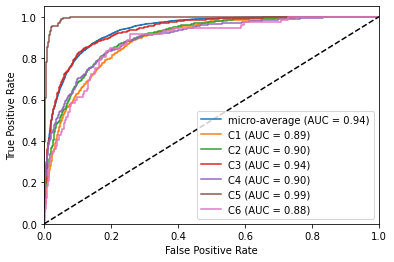

In [498]:
# Plot ROC curve: multiclass
fig=plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='C{0} (AUC = {1:0.2f})'
                                   ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# fig.savefig('multiclass_tanh2-128-96-40epochs.png')